In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('data.xls', header=1)

In [13]:
# Verify column names
print("Dataset Columns:", df.columns.tolist())

Dataset Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [14]:
# Basic Information
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Shape: (30000, 25)

First few rows of the dataset:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_

In [15]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [16]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9

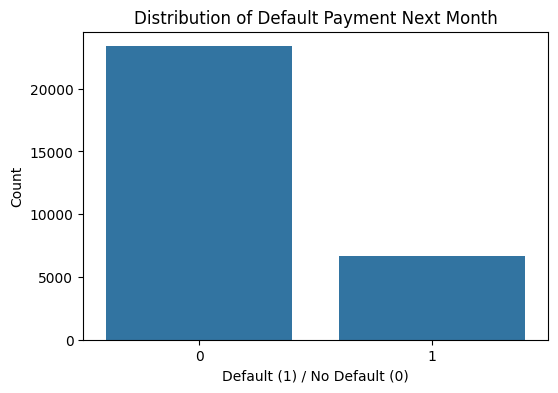

In [17]:

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default (1) / No Default (0)')
plt.ylabel('Count')
plt.show()

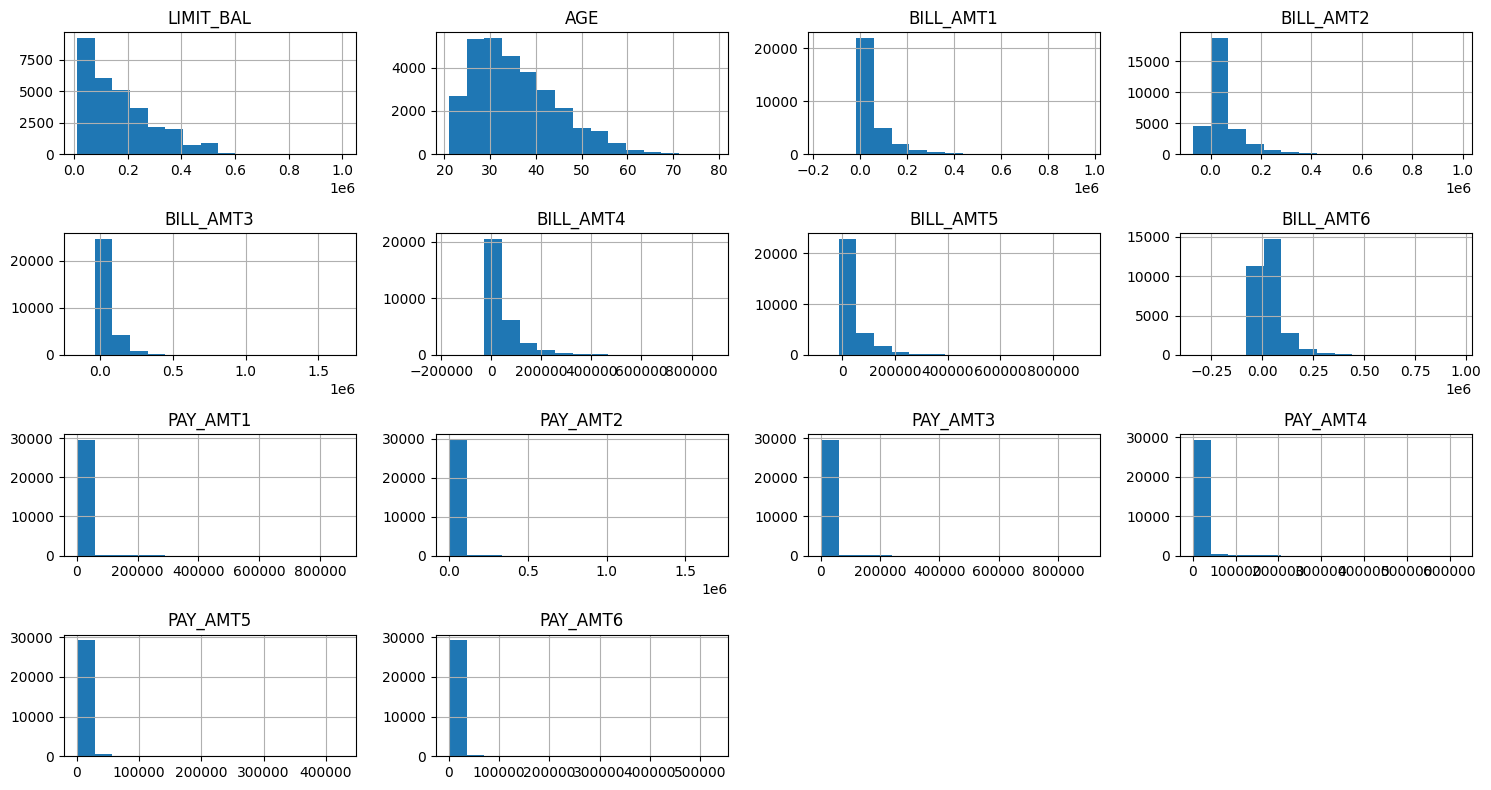

In [18]:
# Define feature groups based on descriptive names
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
                      'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                      'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
repayment_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Distribution of numerical features
df[numerical_features].hist(bins=15, figsize=(15, 8), layout=(4, 4))
plt.tight_layout()
plt.show()

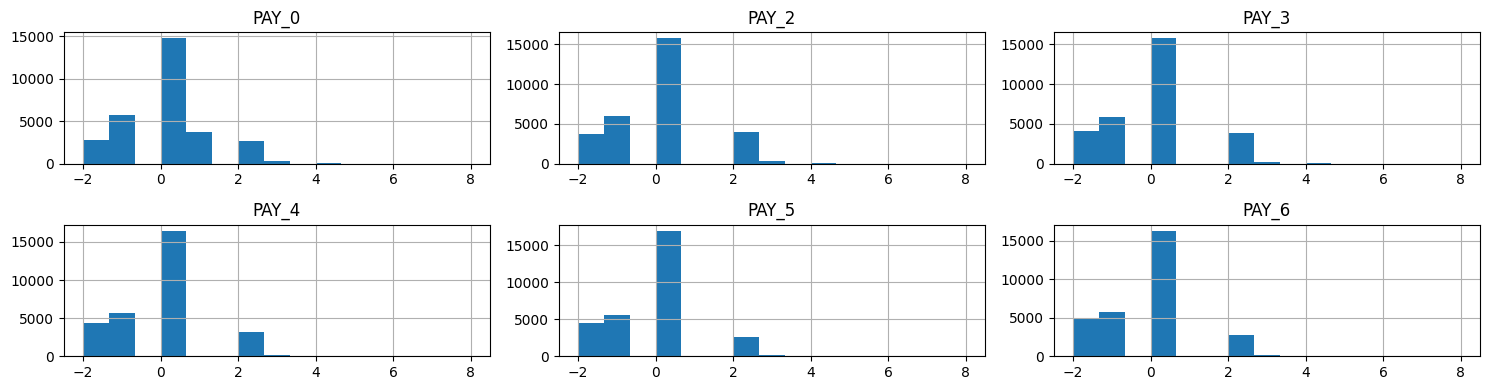

In [19]:
# Distribution of repayment status features
df[repayment_features].hist(bins=15, figsize=(15, 4), layout=(2, 3))
plt.tight_layout()
plt.show()

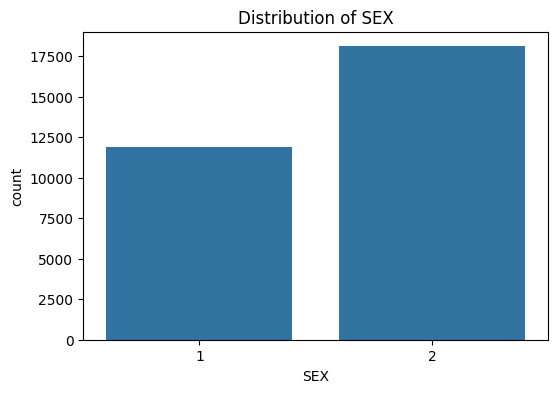

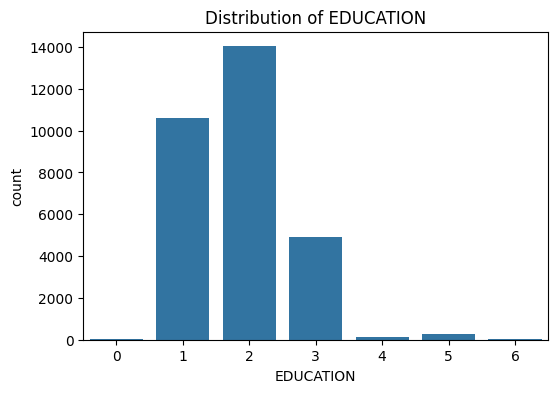

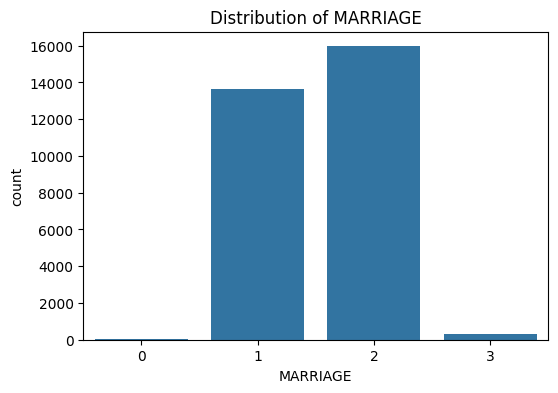

In [20]:
# Distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()


Default Rate by Categorical Features:

SEX:
SEX
1    0.241672
2    0.207763
Name: default payment next month, dtype: float64


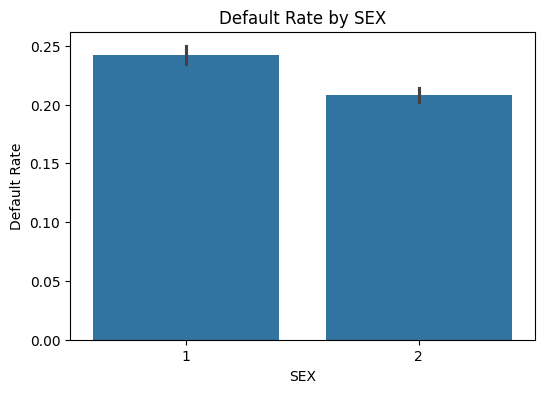


EDUCATION:
EDUCATION
0    0.000000
1    0.192348
2    0.237349
3    0.251576
4    0.056911
5    0.064286
6    0.156863
Name: default payment next month, dtype: float64


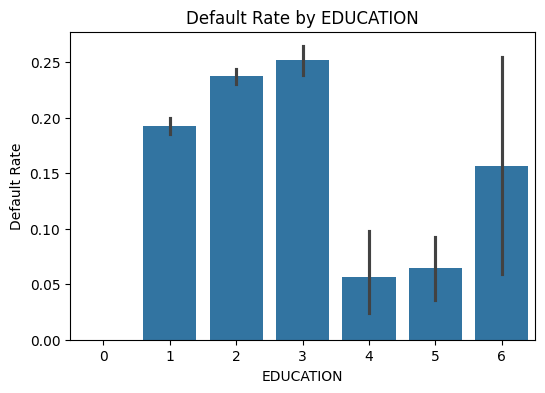


MARRIAGE:
MARRIAGE
0    0.092593
1    0.234717
2    0.209283
3    0.260062
Name: default payment next month, dtype: float64


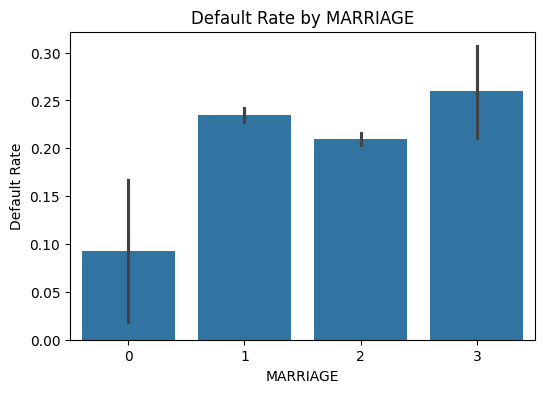

In [21]:
# Default rate by categorical features
print("\nDefault Rate by Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(df.groupby(feature)['default payment next month'].mean())
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature, y='default payment next month', data=df)
    plt.title(f'Default Rate by {feature}')
    plt.ylabel('Default Rate')
    plt.show()

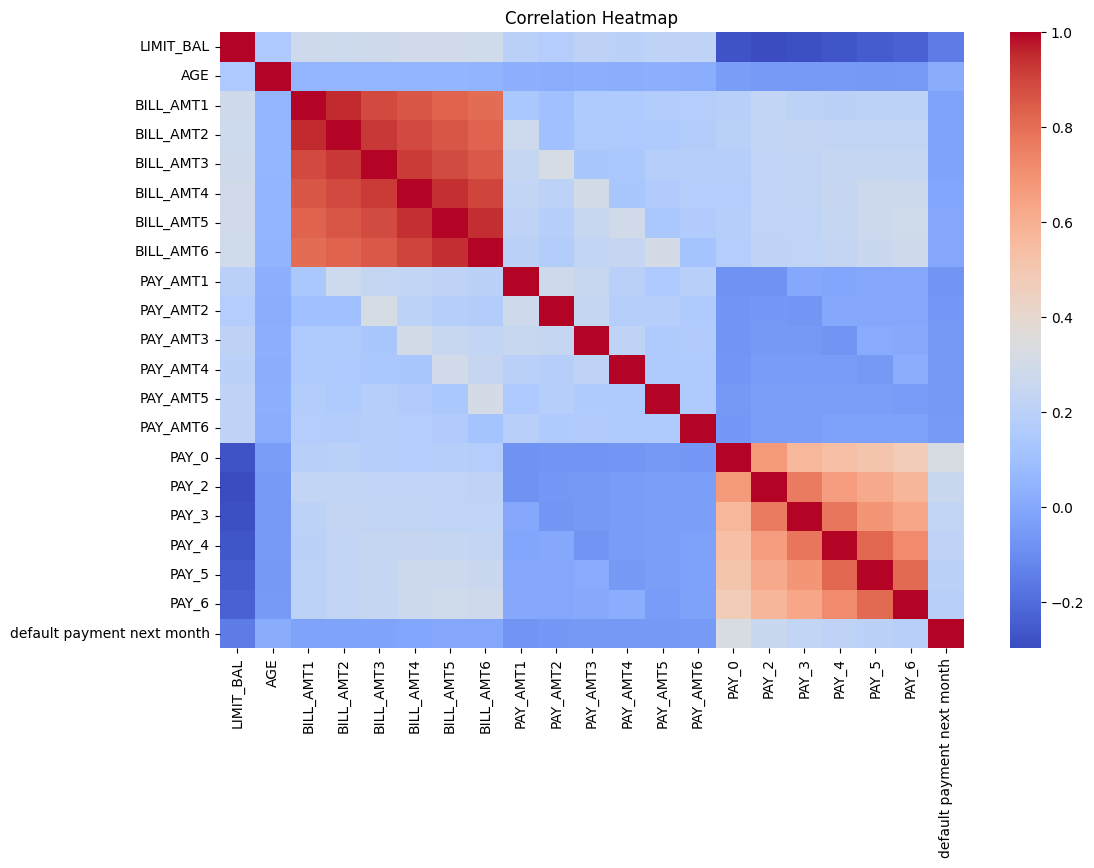

In [22]:
# Correlation analysis for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features + repayment_features + ['default payment next month']].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

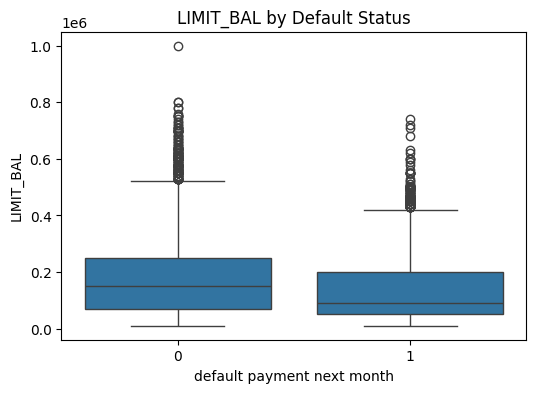

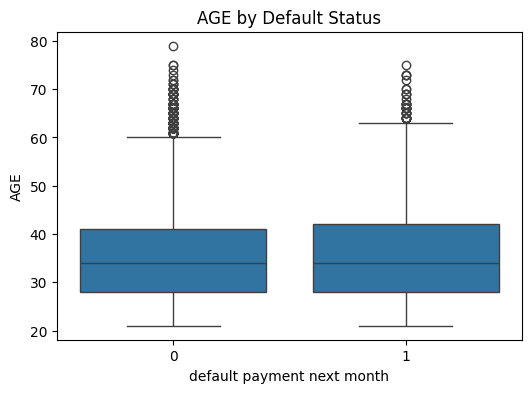

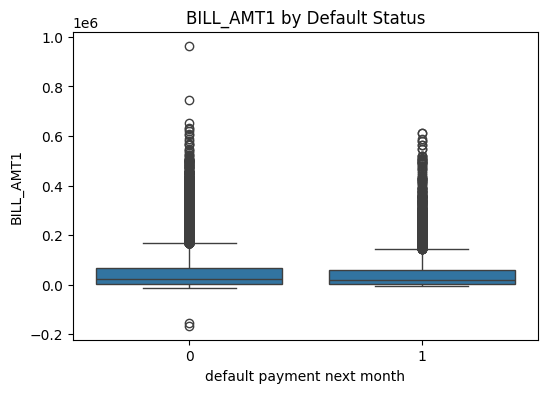

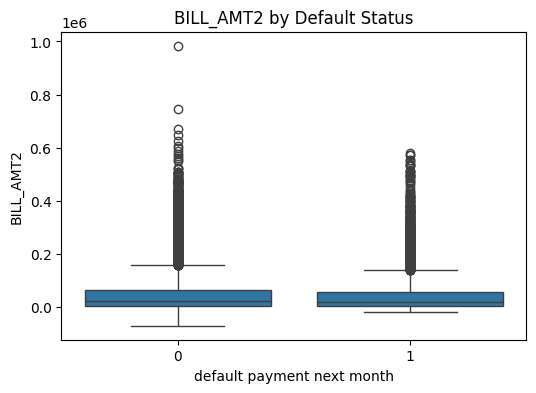

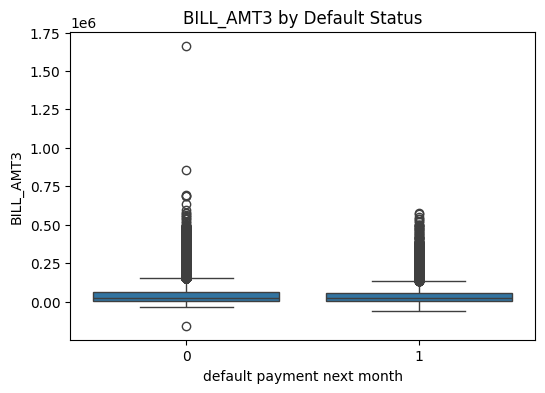

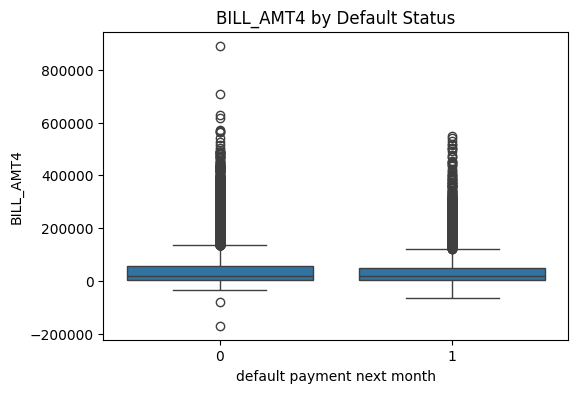

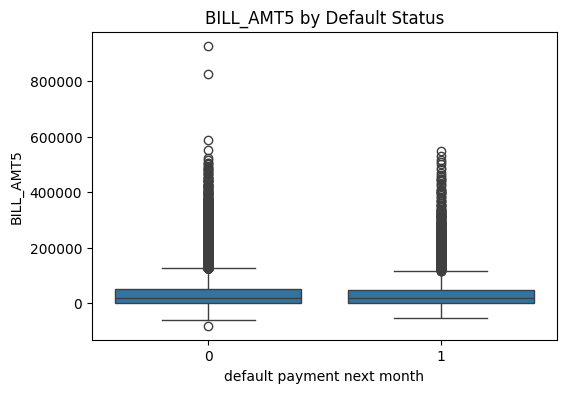

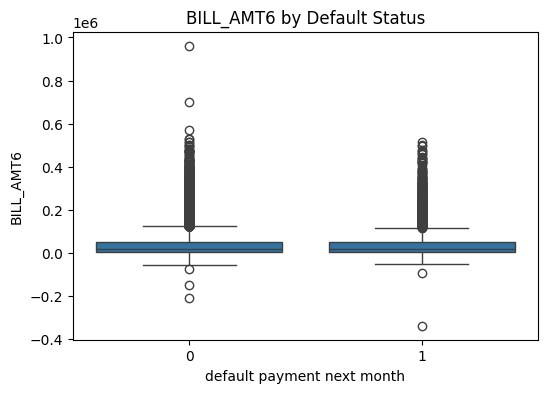

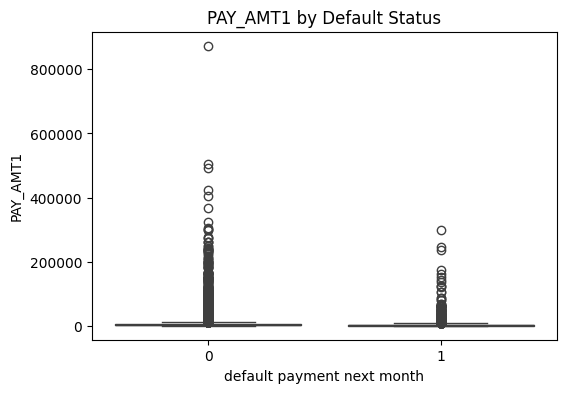

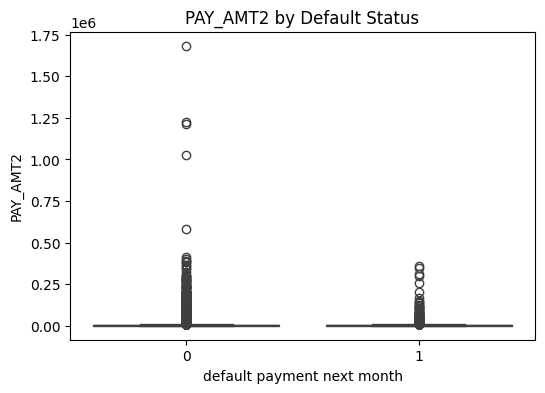

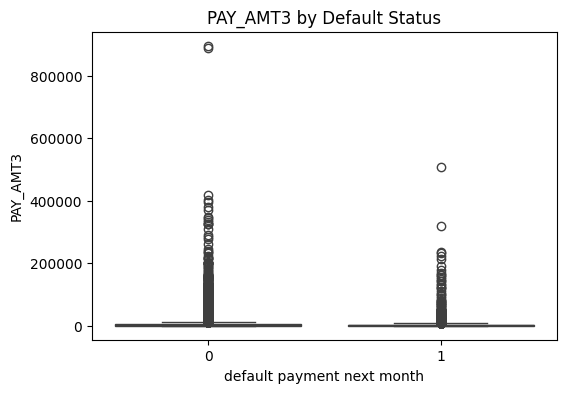

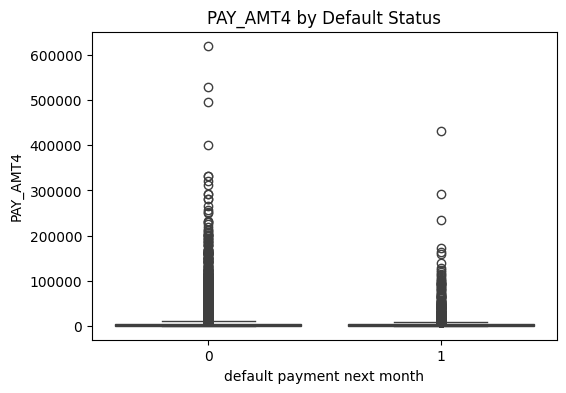

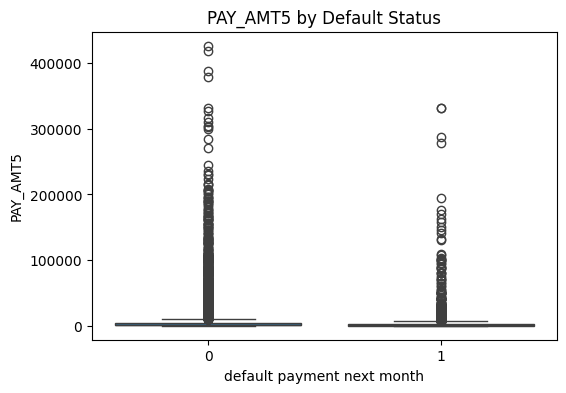

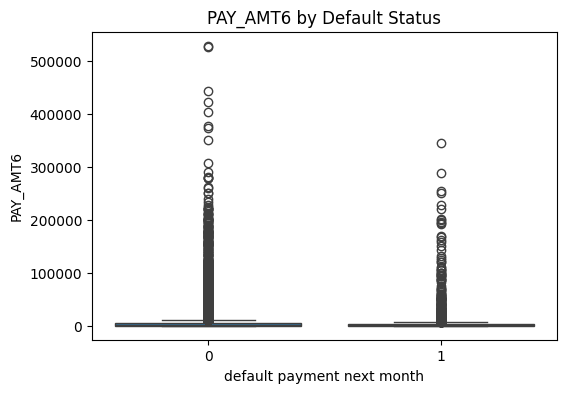

In [23]:
# Boxplots to check for outliers in numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='default payment next month', y=feature, data=df)
    plt.title(f'{feature} by Default Status')
    plt.show()

In [24]:
# Save the dataset for the modeling notebook
df.to_csv('credit_default_cleaned_no_mapping.csv', index=False)
print("Dataset saved as 'credit_default_cleaned_no_mapping.csv'")

Dataset saved as 'credit_default_cleaned_no_mapping.csv'


In [27]:
df[df['default payment next month']==1]['PAY_0'].value_counts()

PAY_0
 0    1888
 2    1844
 1    1252
-1     954
-2     365
 3     244
 4      52
 5      13
 8      11
 7       7
 6       6
Name: count, dtype: int64

In [28]:
df[df['default payment next month']==0]['PAY_0'].value_counts()

PAY_0
 0    12849
-1     4732
 1     2436
-2     2394
 2      823
 3       78
 4       24
 5       13
 8        8
 6        5
 7        2
Name: count, dtype: int64